In [1]:
%load_ext autoreload
%autoreload 2

# In-silico color mix experiment

This notebook walks through how to run an 'in-silico' color mixing experiment. This uses a simulated/calculated color mixing calculation to create and measure mixed colors instead of mixing and measuring them on Jubilee. This makes it easier and faster to experiment with the optimization details without getting stuck on Jubilee motion platform problems

In [2]:
import cv2
import numpy as np
from PIL import Image

from jubilee_pipette_bodemo.color_matcher import ColorMatcher
from jubilee_pipette_bodemo.in_silico_mixing import synthetic_image
import jubilee_pipette_bodemo.image_processing as image_processing

import requests

# ------ Data visualization outside of the notebook ------
import matplotlib
#matplotlib.use('Qt5Agg')

import io

import torch

## Launch the bayesian optimization server 

This implementation uses my bo-serving package to serve a bayesian optimization service as an HTTP API endpoint. Everything to do this is configured within the color mixing code we use here. All that needs to be done is to start up the service:

1. Clone the bo-serving repo: https://github.com/pozzo-research-group/bo-serving
2. Install the bo-serving repo: from the root of the repo, run `pip install -e .`
3. Change directories into 'src/bo_serving/botorch_serving'
4. Run the command `flask --app serve_botorch run` to launch the server

If step 4 ran correctly, you are all set!

## Create the color matcher object

This creates the 'ColorMatcher' object with the parameters we want to use for testing. Here, we are using 5 total stocks, a 'sample volume' of 300 (this is a carryover from the experimental color mixing and lets us use the same python code for both versions), a euclidean distance color score, simulated mixing, and the 5 colors in the 'in silico colors' list are the colors our experiment will use to mix.

In [4]:
RobRoss = ColorMatcher(5, sample_volume=300, score_type='euclidean', in_silico_mixing = True, in_silico_colors = [[255, 0, 0], [255, 255, 0], [0,0,255], [255,255,255], [0,0,0]], n_random_its=5, n_bo_its=20)

AssertionError: Error when creating new experiment on service. Error: b''

## Pick a color

You need to click on the blue box and select a target color for the selection to register correctly as an RGB value

In [4]:
target_color = RobRoss.select_target_color()

ColorPicker(value='blue', description='Pick a color')

## Run the campaign

This will run the experiment. The first number will determine the number of total experiments run. The first n_random_its experiments (specified when we created the RobRoss object) will be run with random sample selection, and the rest will use bayesian optimization.

[autoreload of pandas._testing failed: Traceback (most recent call last):
  File "/Users/bgpelkie/miniconda3/envs/jubilee/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Users/bgpelkie/miniconda3/envs/jubilee/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Users/bgpelkie/miniconda3/envs/jubilee/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/bgpelkie/miniconda3/envs/jubilee/lib/python3.9/site-packages/pandas/_testing/__init__.py", line 404, in <module>
    cython_table = pd.core.common._cython_table.items()
AttributeError: module 'pandas.core' has no attrib

http optimizer is asking service for next trial experiment 45833347461144490030626351351305553398


AssertionError: Error when getting next trial, b''

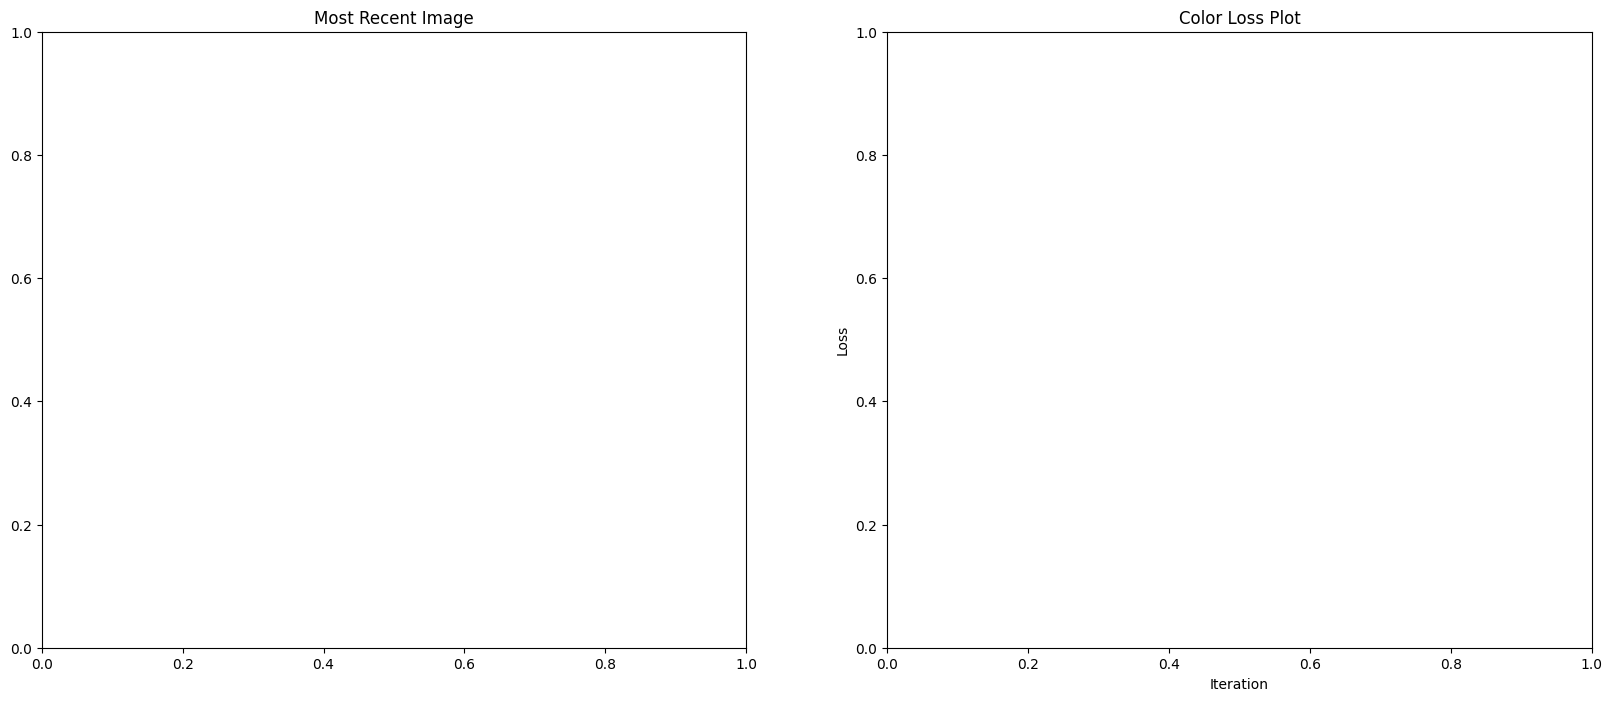

In [6]:
RobRoss.run_campaign(25, None, None, None, None, None, starting_well = 0, save =True)

## Open the dashboard to view performance:

1. From the root of the Jubilee_pipette_BOdemo repo, change directories into 'streamlit_dash'
2. Run 